Goals

1. As real-time, high-freq as possible data points about the global economy
2. Start with major yield curves and show composition / contributions to total yield curves of various countries - where are yield curves flattening, where steepening (contrib are to one global yieldcurve, weighted by GDP?)
3. Include nowcasts
4. Scrape important headlines?



In [86]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.close('all')

In [119]:
yieldcurve_full_data = quandl.get("USTREASURY/YIELD", authtoken="e4FyZJfz6ukboUWG4Pm_")

In [120]:
yieldcurve_DF = pd.DataFrame(yieldcurve_full_data)

In [121]:
yieldcurve_full_data.to_csv("yieldcurve_full_data.csv")    # dump into CSV file

In [122]:
yieldcurve_DF.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [123]:
yieldcurve_DF.tail()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2019-02-22,2.43,2.45,2.46,2.51,2.55,2.48,2.46,2.47,2.55,2.65,2.86,3.02
2019-02-25,2.44,2.46,2.47,2.52,2.56,2.51,2.48,2.48,2.57,2.67,2.87,3.03
2019-02-26,2.43,2.44,2.45,2.52,2.56,2.48,2.44,2.45,2.54,2.64,2.84,3.01
2019-02-27,2.43,2.44,2.45,2.53,2.55,2.50,2.48,2.49,2.59,2.69,2.91,3.07
2019-02-28,2.44,2.47,2.45,2.50,2.54,2.52,2.50,2.52,2.63,2.73,2.94,3.09


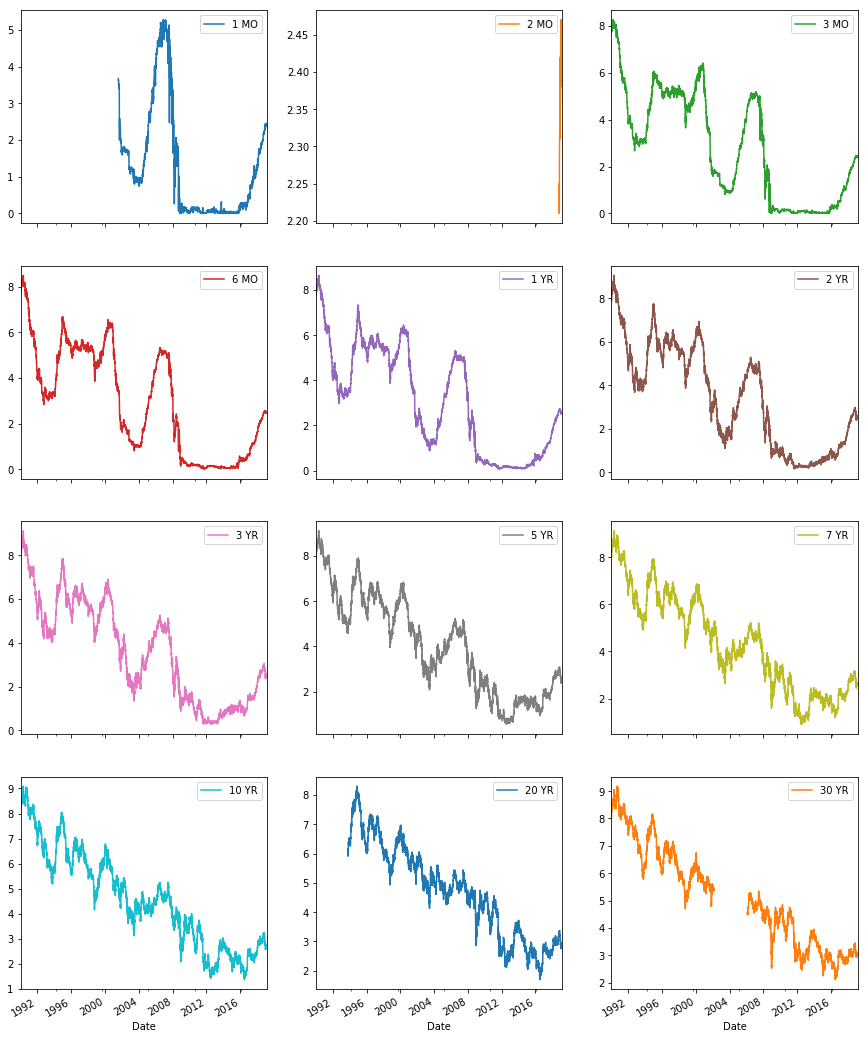

In [124]:
yieldcurve_DF.plot(subplots=True, layout=(4,3), figsize=(15, 20))
plt.show()

In [161]:
#yieldcurve_DF.plot(colormap="cubehelix",figsize=(15, 15)) # subplots=True, layout=(4,3))
#plt.show()

In [125]:
import pandas_datareader.data as web
import datetime

In [126]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 3, 27)

In [127]:
gdp = web.DataReader('GDP', 'fred', start, end)
gdp.head()

,GDP
DATE,
2010-01-01,14721.350
2010-04-01,14926.098
2010-07-01,15079.917
2010-10-01,15240.843
2011-01-01,15285.828


In [128]:
gdp.loc['2013-01-01']

GDP    16569.591
Name: 2013-01-01 00:00:00, dtype: float64

In [129]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, end)

In [130]:
inflation.head()

,CPIAUCSL,CPILFESL
DATE,,
2010-01-01,217.488,220.633
2010-02-01,217.281,220.731
2010-03-01,217.353,220.783
2010-04-01,217.403,220.822
2010-05-01,217.290,220.962


#### 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity 

In [131]:
fredyc = web.DataReader(['T10Y3MM'], 'fred', start, end)

In [132]:
fredyc.head()

,T10Y3MM
DATE,
2010-01-01,3.67
2010-02-01,3.58
2010-03-01,3.58
2010-04-01,3.69
2010-05-01,3.26


In [133]:
fredyc.tail()

,T10Y3MM
DATE,
2018-09-01,0.83
2018-10-01,0.86
2018-11-01,0.75
2018-12-01,0.42
2019-01-01,0.29


#### 10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity 

In [152]:
TSY2y10y_fred = web.DataReader(['T10Y2Y'], 'fred', start, end)

In [153]:
TSY2y10y_fred.tail()

,T10Y2Y
DATE,
2019-02-21,0.16
2019-02-22,0.17
2019-02-25,0.16
2019-02-26,0.16
2019-02-27,0.19


In [137]:
# finalised dataframe write to different file  pandasDF.to_csv("......csv")

In [138]:
import os
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'Macro dashboard.ipynb',
 'ust.csv',
 'yieldcurve_full_data.csv']

In [139]:
yieldcurve_DF.columns

Index(['1 MO', '2 MO', '3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR', '7 YR',
       '10 YR', '20 YR', '30 YR'],
      dtype='object')

In [162]:
TSY3m2y =  yieldcurve_DF['2 YR'] - yieldcurve_DF['3 MO']

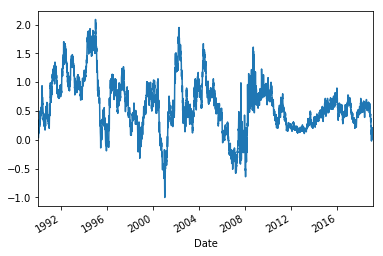

In [163]:
TSY3m2y.plot()

In [157]:
TSY2y10y_quandl =  yieldcurve_DF['10 YR'] - yieldcurve_DF['2 YR']

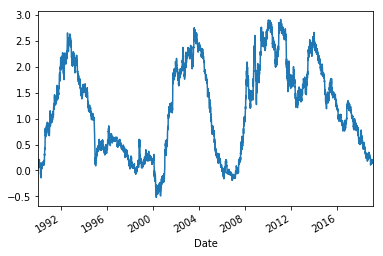

In [158]:
TSY2y10y_quandl.plot()

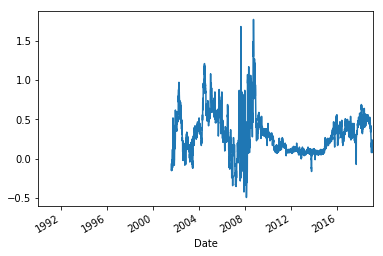

In [160]:
TSY1m1y_quandl =  yieldcurve_DF['1 YR'] - yieldcurve_DF['1 MO']
TSY1m1y_quandl.plot()
plt.show()

In [164]:
TSY3m10y_quandl =  yieldcurve_DF['10 YR'] - yieldcurve_DF['3 MO']

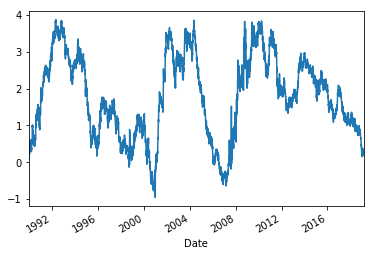

In [165]:
TSY3m10y.plot()

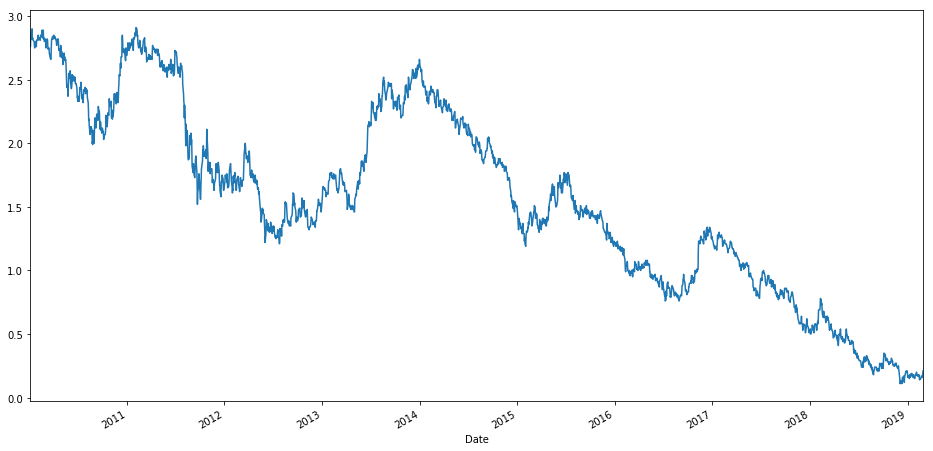

In [173]:
TSY2y10y_quandl.loc['20100102':].plot(figsize=(16, 8))
plt.show()

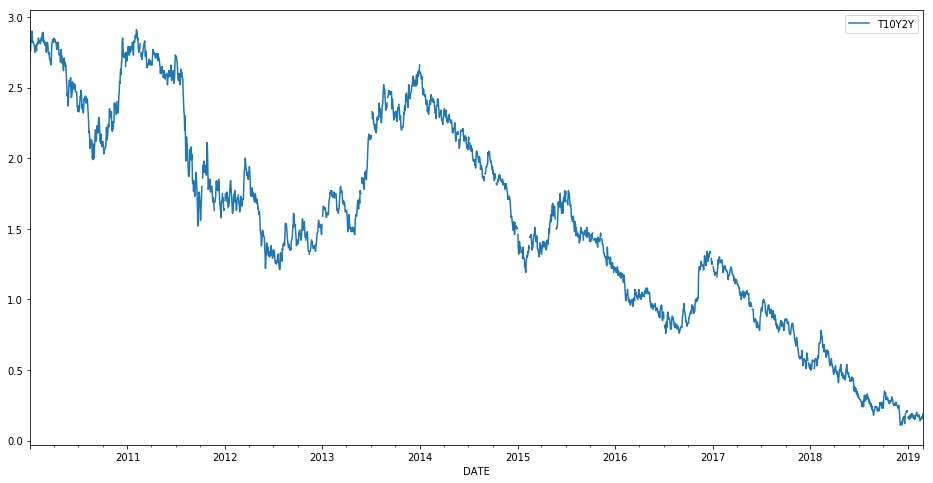

In [174]:
TSY2y10y_fred.loc['20100102':].plot(figsize=(16, 8))
plt.show()

In [232]:
import missingno as msno

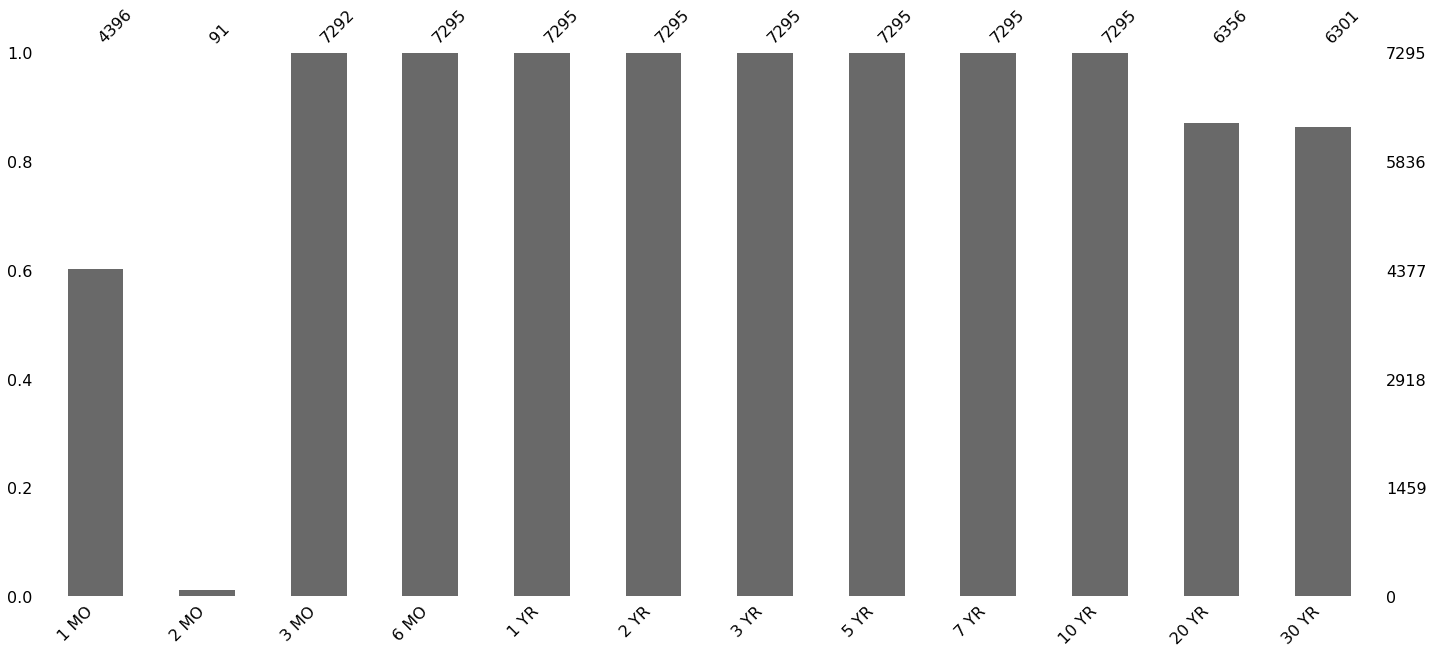

In [231]:
msno.bar(yieldcurve_DF.sample(7295))

In [599]:
DE2y = pd.read_csv("DE2y.csv", sep=';', decimal=',')
#DE2y = pd.read_csv("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3213&its_csvFormat=en&its_fileFormat=csv&mode=its")
DE2y['BBK01.WT3213'] = [x.replace(',', '.') for x in DE2y['BBK01.WT3213']]
DE2y = DE2y[4:-1]
DE2y = DE2y[DE2y["BBK01.WT3213_FLAGS"] != 'Kein Wert vorhanden']
DE2y = DE2y.drop(["BBK01.WT3213_FLAGS"], axis=1)
DE2y.reset_index(drop=True, inplace=True)
new_columns = DE2y.columns.values
new_columns[0] = 'DATE'
new_columns[1] = 'RATE'
DE2y.columns = new_columns
DE2y.RATE = DE2y.RATE.astype(float)

In [592]:
DE2y['DATE'] = pd.to_datetime(DE2y['DATE'])

In [593]:
DE2y.set_index(['DATE'], drop=True, inplace=True)

In [594]:
DE2y.tail(n=10)

,RATE
DATE,
2019-02-18,-0.57
2019-02-19,-0.59
2019-02-20,-0.59
2019-02-21,-0.57
2019-02-22,-0.57
2019-02-25,-0.56
2019-02-26,-0.56
2019-02-27,-0.56
2019-02-28,-0.55


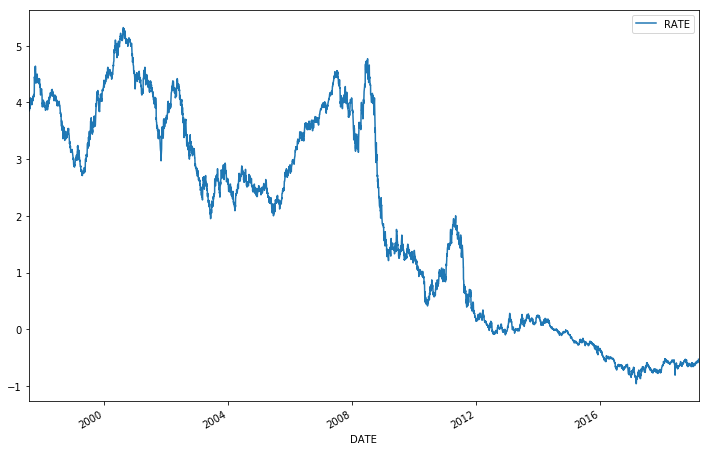

In [595]:
DE2y.plot(figsize=(12,8))
plt.show()

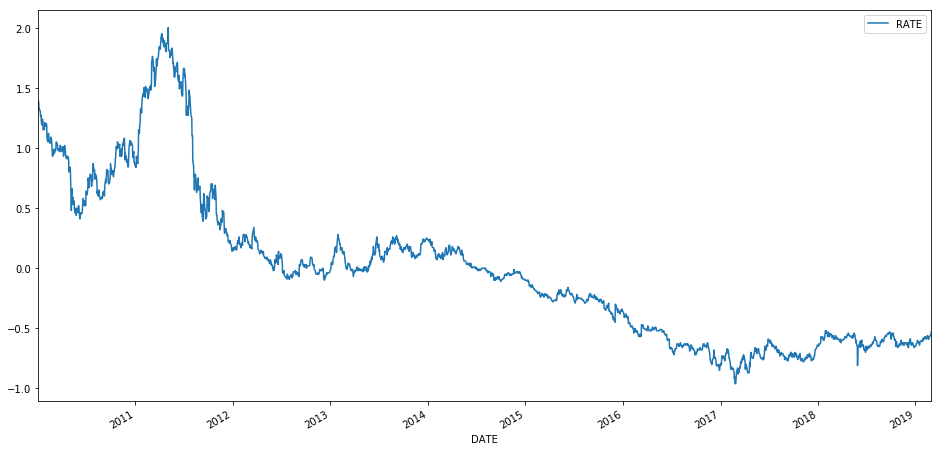

In [576]:
DE2y.loc['20100102':].plot(figsize=(16, 8))
plt.show()

In [619]:
DETEST = pd.read_csv("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3213&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=hypothetical&its_dateFormat=default&its_from=&its_to=", sep=';')
DETEST.head(n=10)


,Unnamed: 0,BBK01.WT3213,BBK01.WT3213_FLAGS
0,NaN,Zinsstrukturkurve (Svensson-Methode) / Börsenn...,NaN
1,Einheit,PROZENT (hypothetisch auf Eurobasis),NaN
2,Dimension,Eins,NaN
3,Stand vom,01.03.2019 13:03:48 Uhr,NaN
4,1997-08-01,.,Kein Wert vorhanden
5,1997-08-02,.,Kein Wert vorhanden
6,1997-08-03,.,Kein Wert vorhanden
7,1997-08-04,.,Kein Wert vorhanden
8,1997-08-05,.,Kein Wert vorhanden
9,1997-08-06,.,Kein Wert vorhanden


In [615]:
DETEST2 = pd.read_csv("DE2y.csv", sep=';', decimal=',')
DETEST2.head()

,Unnamed: 0,BBK01.WT3213,BBK01.WT3213_FLAGS
0,NaN,Zinsstrukturkurve (Svensson-Methode) / Börsenn...,NaN
1,Einheit,PROZENT,NaN
2,Dimension,Eins,NaN
3,Stand vom,01.03.2019 13:03:48 Uhr,NaN
4,1997-08-01,.,Kein Wert vorhanden


In [713]:
URL = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3213&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=hypothetical&its_dateFormat=default&its_from=&its_to=")
DETEST = pd.read_csv(URL, sep=';')
DETEST['BBK01.WT3213'] = [x.replace(',', '.') for x in DETEST['BBK01.WT3213']]
DETEST = DETEST[4:-1]
DETEST = DETEST[DETEST["BBK01.WT3213_FLAGS"] != 'Kein Wert vorhanden']
DETEST = DETEST.drop(["BBK01.WT3213_FLAGS"], axis=1)
DETEST.reset_index(drop=True, inplace=True)
new_columns = DETEST.columns.values
new_columns[0] = 'DATE'
new_columns[1] = 'RATE'
DETEST.columns = new_columns
DETEST.RATE = DETEST.RATE.astype(float)
DETEST['DATE'] = pd.to_datetime(DETEST['DATE'])
#DETEST.set_index(['DATE'], drop=True, inplace=True)

In [715]:
DETEST.head(n=10)

,DATE,RATE
0,1997-08-07,3.90
1,1997-08-08,3.88
2,1997-08-11,3.85
3,1997-08-12,3.86
4,1997-08-13,3.96
5,1997-08-14,3.96
6,1997-08-15,4.00
7,1997-08-18,3.93
8,1997-08-19,3.89
9,1997-08-20,3.95


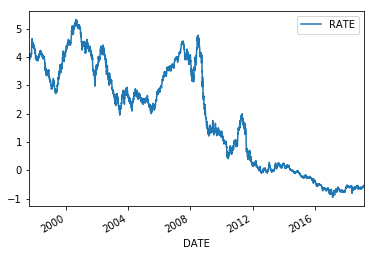

In [671]:
DETEST.plot()

In [677]:
URL = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3213&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=hypothetical&its_dateFormat=default&its_from=&its_to=")
DETEST = pd.read_csv(URL, sep=';')
DETEST = DETEST[4:-1]
new_columns = DETEST.columns.values
new_columns[0] = 'DATE'
new_columns[1] = 'RATE'
DETEST.columns = new_columns
dropcolumn = DETEST.columns[2]
DETEST = DETEST[DETEST[dropcolumn] != 'Kein Wert vorhanden']
DETEST = DETEST.drop([dropcolumn], axis=1)
DETEST.reset_index(drop=True, inplace=True)
DETEST['RATE'] = [x.replace(',', '.') for x in DETEST['RATE']]
DETEST.RATE = DETEST.RATE.astype(float)
DETEST['DATE'] = pd.to_datetime(DETEST['DATE'])
DETEST.set_index(['DATE'], drop=True, inplace=True)

DETEST.tail(n=10)

,RATE
DATE,
2019-02-18,-0.57
2019-02-19,-0.59
2019-02-20,-0.59
2019-02-21,-0.57
2019-02-22,-0.57
2019-02-25,-0.56
2019-02-26,-0.56
2019-02-27,-0.56
2019-02-28,-0.55


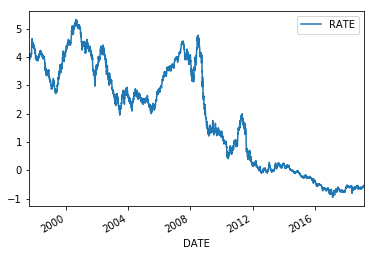

In [679]:
DETEST.plot()
plt.show()

In [681]:
URL = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3229&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DETEST = pd.read_csv(URL, sep=';')
DETEST = DETEST[4:-1]
new_columns = DETEST.columns.values
new_columns[0] = 'DATE'
new_columns[1] = 'RATE'
DETEST.columns = new_columns
dropcolumn = DETEST.columns[2]
DETEST = DETEST[DETEST[dropcolumn] != 'Kein Wert vorhanden']
DETEST = DETEST.drop([dropcolumn], axis=1)
DETEST.reset_index(drop=True, inplace=True)
DETEST['RATE'] = [x.replace(',', '.') for x in DETEST['RATE']]
DETEST.RATE = DETEST.RATE.astype(float)
DETEST['DATE'] = pd.to_datetime(DETEST['DATE'])
DETEST.set_index(['DATE'], drop=True, inplace=True)

DETEST.tail(n=10)

,RATE
DATE,
2019-02-18,0.07
2019-02-19,0.07
2019-02-20,0.07
2019-02-21,0.09
2019-02-22,0.09
2019-02-25,0.10
2019-02-26,0.09
2019-02-27,0.11
2019-02-28,0.15


In [687]:
def bunds_clean(URL):
    DF = pd.read_csv(URL, sep=';')
    # remove rows without relevant data
    DF = DF[4:-1]
    # rename columns to give meaningful name
    new_columns = DF.columns.values
    new_columns[0] = 'DATE'
    new_columns[1] = 'RATE'
    DF.columns = new_columns
    # assign last column to variable dropcolumn
    dropcolumn = DF.columns[2]
    # use dropcolumn to remove rows with missing values with
    # string in German instead of NaN
    DF = DF[DF[dropcolumn] != 'Kein Wert vorhanden']
    # remove last column after using it to remove missing values
    DF = DF.drop([dropcolumn], axis=1)
    # reset dataframe index to 0 - was not the case because we removed rows earlier
    DF.reset_index(drop=True, inplace=True)
    # replace German comma (,) with dot in RATE column
    DF['RATE'] = [x.replace(',', '.') for x in DF['RATE']]
    # convert RATE column values from string to float
    DF.RATE = DF.RATE.astype(float)
    # convert DATE column values from string to datetime
    DF['DATE'] = pd.to_datetime(DF['DATE'])
    # replace dataframe index with DATE column
    DF.set_index(['DATE'], drop=True, inplace=True)
    return DF

In [689]:
# assigns URL for 2y Bunds to input variable
DE2y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3213&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE2y = bunds_clean(DE2y_input)

# assigns URL for 10y Bunds to input variable
DE10y_input = ("https://www.bundesbank.de/statistic-rmi/StatisticDownload?tsId=BBK01.WT3229&mode=its&its_fileFormat=csv&its_csvFormat=de&its_currency=default&its_dateFormat=default&its_from=&its_to=")
DE10y = bunds_clean(DE10y_input)

In [695]:
DE2y.tail()

,RATE
DATE,
2019-02-25,-0.56
2019-02-26,-0.56
2019-02-27,-0.56
2019-02-28,-0.55
2019-03-01,-0.53


In [696]:
DE10y.tail()

,RATE
DATE,
2019-02-25,0.10
2019-02-26,0.09
2019-02-27,0.11
2019-02-28,0.15
2019-03-01,0.17


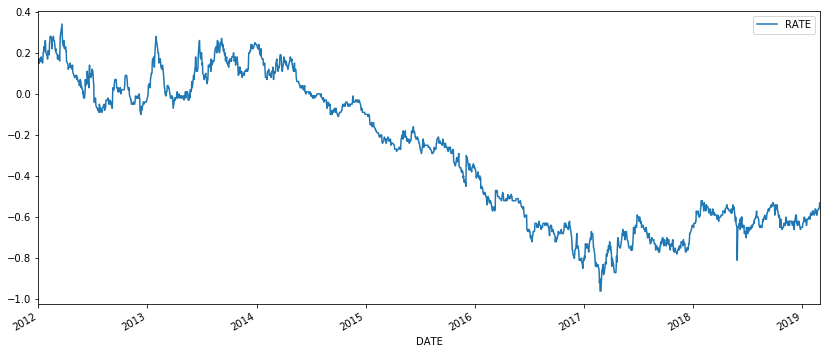

In [717]:
start = '20120101'
end = ''
DE2y.loc[start:].plot(figsize=(14, 6))
plt.show()

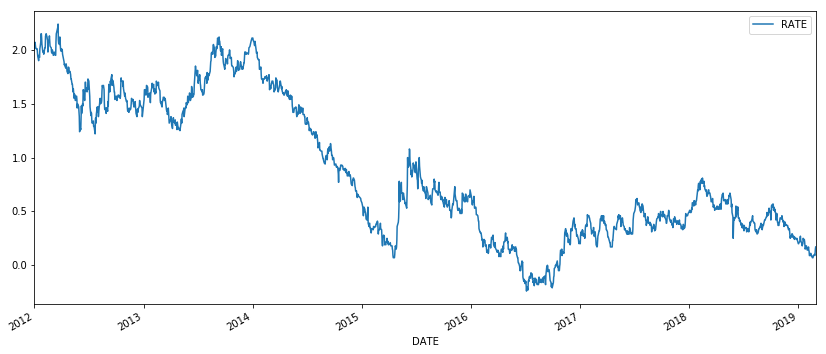

In [706]:
start = '20120101'
end = ''
DE10y.loc[start:].plot(figsize=(14, 6))
plt.show()

In [708]:
DE2y10y =  DE10y['RATE'] - DE2y['RATE']

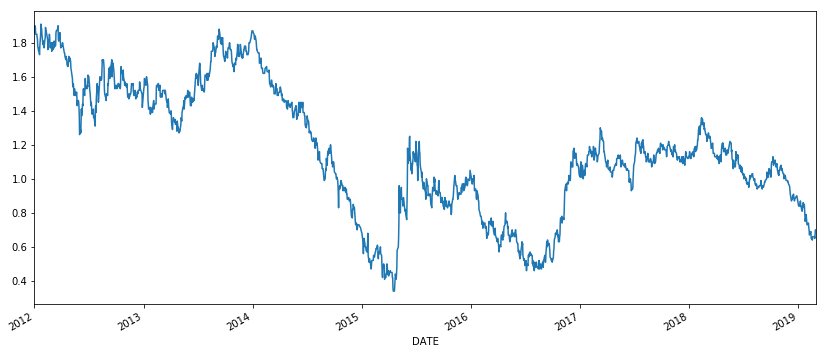

In [712]:
DE2y10y.loc[start:].plot(figsize=(14, 6))
plt.show()